X shape: (758, 10) y shape: (758, 1)


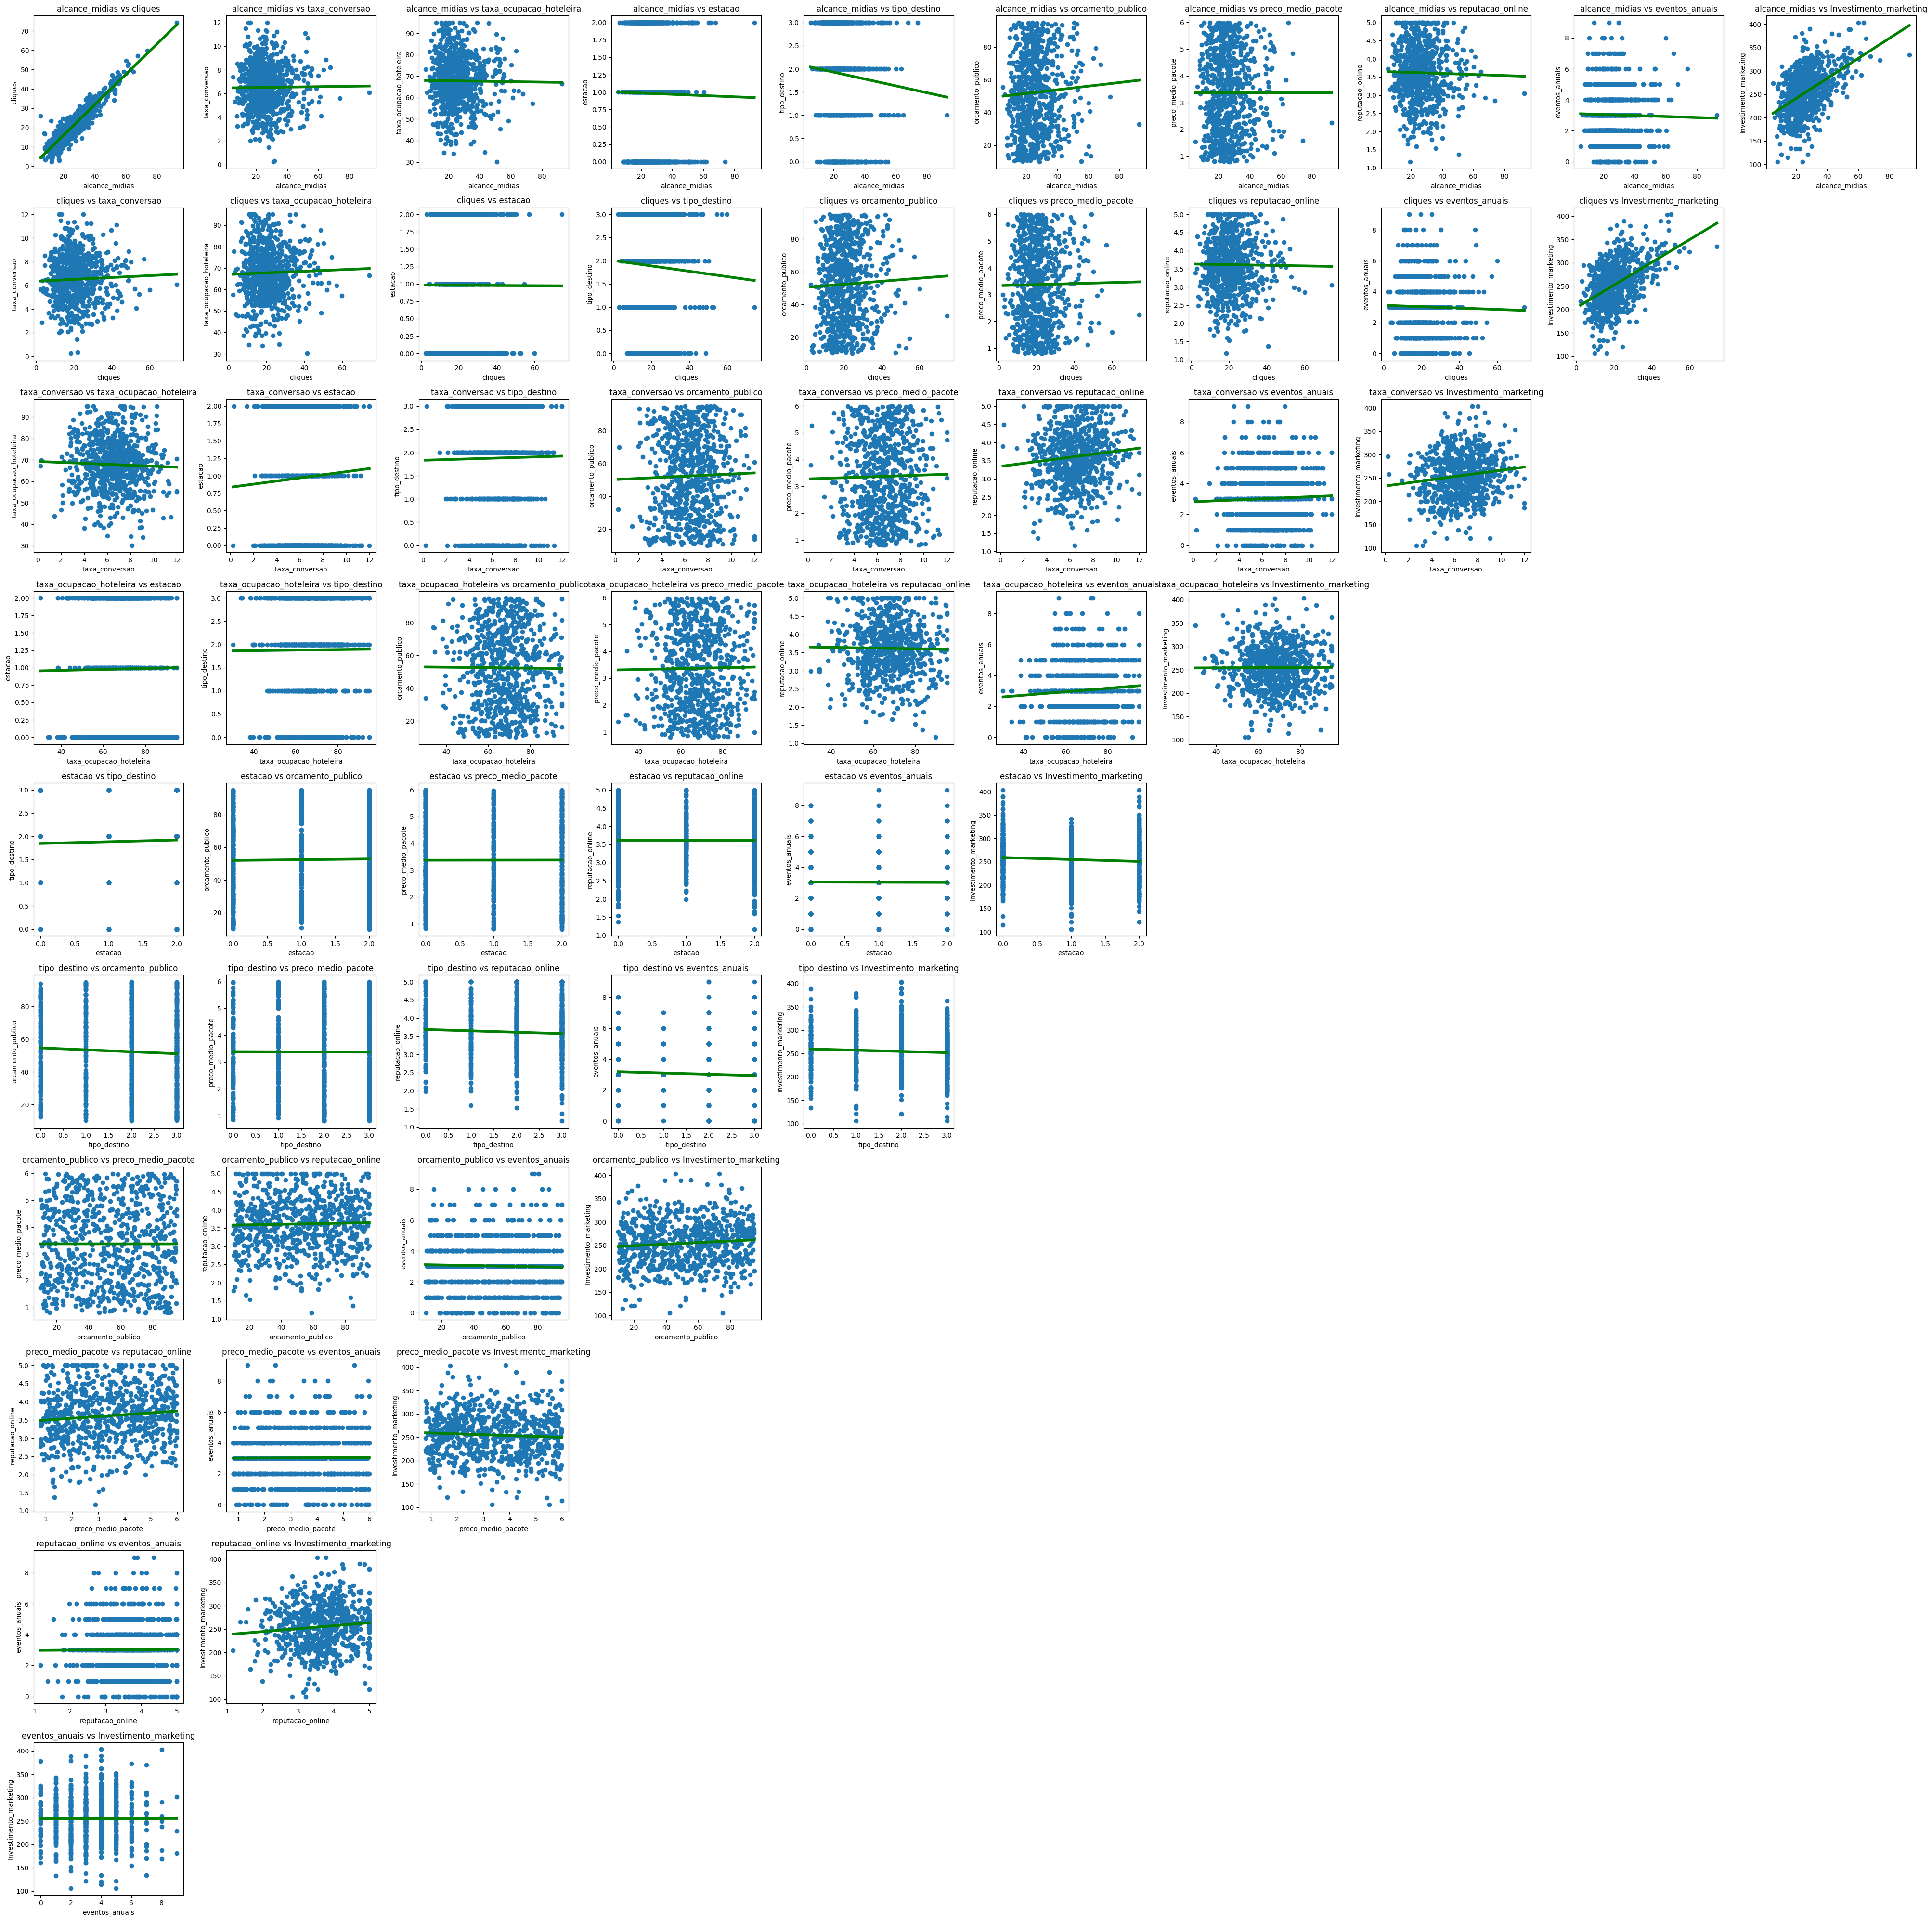

                         Investimento_marketing  alcance_midias  cliques  \
Investimento_marketing                    1.000           0.491    0.468   
alcance_midias                            0.491           1.000    0.935   
cliques                                   0.468           0.935    1.000   
taxa_conversao                            0.136           0.010    0.038   
taxa_ocupacao_hoteleira                   0.005          -0.010    0.029   
orcamento_publico                         0.085           0.050    0.035   
preco_medio_pacote                       -0.058           0.000    0.012   
reputacao_online                          0.099          -0.021   -0.011   
eventos_anuais                            0.003          -0.020   -0.024   

                         taxa_conversao  taxa_ocupacao_hoteleira  \
Investimento_marketing            0.136                    0.005   
alcance_midias                    0.010                   -0.010   
cliques                           0

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from modeloMultiplo import MRLM
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
path = "dados_projeto.xlsx"
df = pd.read_excel(path)

# 1a) Limpeza para remover NaN e valores negativos
num_cols = df.select_dtypes(include=[np.number]).columns
df = df.dropna()
df = df[(df[num_cols] >= 0).all(axis=1)]

df_plot = df.copy()
for col in ['estacao', 'tipo_destino']:
    if col in df_plot.columns:
        df_plot[col] = pd.Categorical(df_plot[col]).codes

# separa y
y = df_plot[['Investimento_marketing']].copy()
X = df_plot.drop(columns=['Investimento_marketing']).copy()

print("X shape:", X.shape, "y shape:", y.shape)
modelo = MRLM(X, y, X_labels=X.columns.tolist(), y_label='Investimento_marketing')

modelo.plot_correlacao_em_pares(show_model=True)


corr = df[num_cols].corr()
print(corr.round(3))


                         Investimento_marketing  alcance_midias  cliques  \
Investimento_marketing                    1.000           0.491    0.468   
alcance_midias                            0.491           1.000    0.935   
cliques                                   0.468           0.935    1.000   
taxa_conversao                            0.136           0.010    0.038   
taxa_ocupacao_hoteleira                   0.005          -0.010    0.029   
orcamento_publico                         0.085           0.050    0.035   
preco_medio_pacote                       -0.058           0.000    0.012   
reputacao_online                          0.099          -0.021   -0.011   
eventos_anuais                            0.003          -0.020   -0.024   

                         taxa_conversao  taxa_ocupacao_hoteleira  \
Investimento_marketing            0.136                    0.005   
alcance_midias                    0.010                   -0.010   
cliques                           0

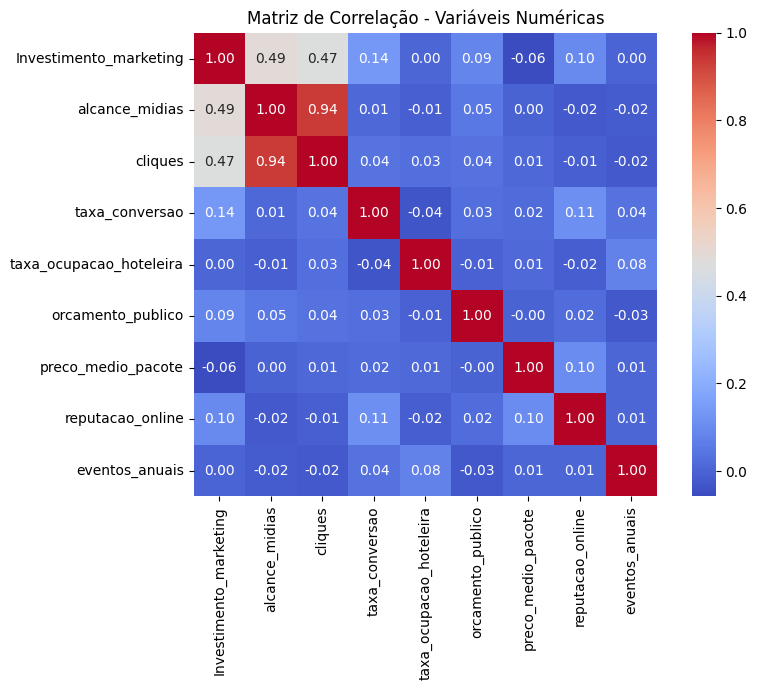



Indices de Colinearidade
                   variable       VIF
1            alcance_midias  8.229624
2                   cliques  8.203157
13      tipo_destino_Urbano  2.082609
12       tipo_destino_Praia  2.065330
11    tipo_destino_Cultural  1.650748
9             estacao_Baixa  1.205037
10            estacao_Media  1.198284
7          reputacao_online  1.027898
3            taxa_conversao  1.026643
4   taxa_ocupacao_hoteleira  1.022566
8            eventos_anuais  1.018764
6        preco_medio_pacote  1.011854
5         orcamento_publico  1.010588


In [8]:
corr = df[num_cols].corr()
print(corr.round(3))

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.tight_layout()
plt.show()


#multicolinearidade
print("\n\nIndices de Colinearidade")
X_vif = df.drop(columns=['Investimento_marketing']).copy()
X_vif = pd.get_dummies(X_vif, columns=['estacao','tipo_destino'], drop_first=True)

X_vif = X_vif.astype(float)

X_vif_const = sm.add_constant(X_vif)

vif = pd.DataFrame()
vif['variable'] = X_vif_const.columns
vif['VIF'] = [variance_inflation_factor(X_vif_const.values, i)
              for i in range(X_vif_const.shape[1])]

vif = vif[vif['variable'] != 'const'].sort_values('VIF', ascending=False)
print(vif)